# Sentiment/Emotional Analysis

## Import Libraries

In [2]:
import pandas as pd
import re
from nrclex import NRCLex
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

Read Data

In [3]:
df_teacher = pd.read_csv('../data/teacher_combine_50.csv')

In [4]:
df_teacher.head()

,subreddit,id,selftext,title,num_comments,created_utc,parent_id,link_id,author,body,all_text
0,Teachers,u35imn,I teach 8th grade at a private school in Ontar...,LGBT teacher with no admin support in traditio...,0.0,1649898781,fromsubmission,fromsubmission,fromsubmission,fromsubmission,I teach 8th grade at a private school in Ontar...
1,Teachers,u35g5w,[removed],Please Help,0.0,1649898562,fromsubmission,fromsubmission,fromsubmission,fromsubmission,"[removed], fromsubmission, Please Help"
2,Teachers,u35fe3,For some context I'm teaching US history. \n\n...,"I got that kid that won't stop being ""that kid"".",0.0,1649898496,fromsubmission,fromsubmission,fromsubmission,fromsubmission,For some context I'm teaching US history. \n\n...
3,Teachers,u35668,I am a middle school coding teacher. I’m wonde...,Can I use class wallet to buy an oculus?,0.0,1649897706,fromsubmission,fromsubmission,fromsubmission,fromsubmission,I am a middle school coding teacher. I’m wonde...
4,Teachers,u353wr,A student turned in their essay (which we work...,Plagiarism &amp; Parents,0.0,1649897510,fromsubmission,fromsubmission,fromsubmission,fromsubmission,A student turned in their essay (which we work...


In [5]:
df_teacher.isnull().sum()

subreddit        0
id               0
selftext        35
title            0
num_comments     0
created_utc      0
parent_id        0
link_id          0
author           0
body             0
all_text         0
dtype: int64

In [7]:
df_teacher.shape

(9995, 11)

In [9]:
df_teacher.dropna(inplace = True)

In [38]:
alltext_t = ','.join(df_teacher['all_text'])
text_t_obj = NRCLex(alltext_t)

In [39]:
data = text_t_obj.raw_emotion_scores
data

{'joy': 15527,
 'positive': 47831,
 'surprise': 9437,
 'trust': 36264,
 'anger': 10169,
 'disgust': 6958,
 'negative': 23715,
 'fear': 11680,
 'sadness': 12892,
 'anticipation': 20235}

In [40]:
emotion_df = pd.DataFrame.from_dict(data, orient = 'index')
emotion_df = emotion_df.reset_index()
emotion_df = emotion_df.rename(columns = {'index' : 'Emotion', 0 : 'Count'})
emotion_df = emotion_df.sort_values(by = ['Count'], ascending = False)

In [41]:
emotion_df

,Emotion,Count
1,positive,47831
3,trust,36264
6,negative,23715
9,anticipation,20235
0,joy,15527
8,sadness,12892
7,fear,11680
4,anger,10169
2,surprise,9437
5,disgust,6958


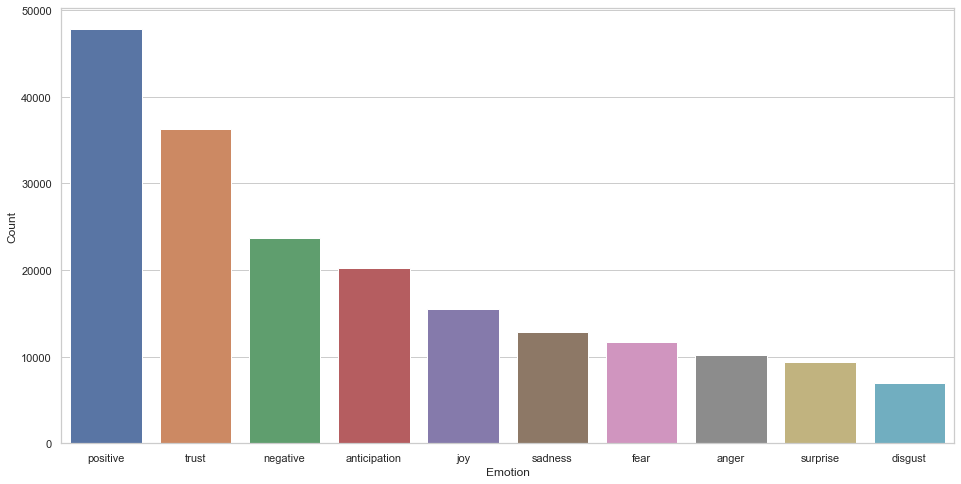

In [42]:
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (16, 8))
sns.barplot(x = 'Emotion', y = 'Count', data = emotion_df);

In [43]:
df_parenting = pd.read_csv('../data/parenting_combine_50.csv')

In [44]:
df_parenting.head()

,subreddit,id,selftext,title,num_comments,created_utc,parent_id,link_id,author,body,all_text
0,Parenting,u35fhw,We recently found a drop in daycare for my 3yr...,Daycare recommends shorter drop offs.,0.0,1649898505,fromsubmission,fromsubmission,fromsubmission,fromsubmission,We recently found a drop in daycare for my 3yr...
1,Parenting,u355wz,So I've lurked on this sub for a long time as ...,Looking for advice for taking the leap to beco...,0.0,1649897684,fromsubmission,fromsubmission,fromsubmission,fromsubmission,So I've lurked on this sub for a long time as ...
2,Parenting,u34x24,So my 20yr old son came back to live with me a...,lazy teenager,0.0,1649896924,fromsubmission,fromsubmission,fromsubmission,fromsubmission,So my 20yr old son came back to live with me a...
3,Parenting,u34vh5,"I feel bad about posting, since I had all the ...",I still haven't bonded with my 1 year old,0.0,1649896790,fromsubmission,fromsubmission,fromsubmission,fromsubmission,"I feel bad about posting, since I had all the ..."
4,Parenting,u34sai,My Steam library is looking a bit thin when it...,PC game advice for a 5 year old.,0.0,1649896511,fromsubmission,fromsubmission,fromsubmission,fromsubmission,My Steam library is looking a bit thin when it...


In [45]:
df_parenting.isnull().sum()

subreddit       0
id              0
selftext        0
title           0
num_comments    0
created_utc     0
parent_id       0
link_id         0
author          0
body            0
all_text        0
dtype: int64

In [46]:
df_parenting.shape

(10000, 11)

In [47]:
alltext_p = ','.join(df_parenting['all_text'])
text_p_obj = NRCLex(alltext_p)

In [49]:
data_p = text_p_obj.raw_emotion_scores
data_p

{'joy': 25826,
 'positive': 52004,
 'trust': 30833,
 'anticipation': 26416,
 'negative': 32401,
 'sadness': 18065,
 'fear': 16848,
 'anger': 14104,
 'disgust': 10834,
 'surprise': 10358}

In [52]:
emotion_p_df = pd.DataFrame.from_dict(data_p, orient = 'index')
emotion_p_df = emotion_p_df.reset_index()
emotion_p_df = emotion_p_df.rename(columns = {'index' : 'Emotion', 0 : 'Count'})
emotion_p_df = emotion_p_df.sort_values(by = ['Count'], ascending = False)

In [53]:
emotion_p_df

,Emotion,Count
1,positive,52004
4,negative,32401
2,trust,30833
3,anticipation,26416
0,joy,25826
5,sadness,18065
6,fear,16848
7,anger,14104
8,disgust,10834
9,surprise,10358


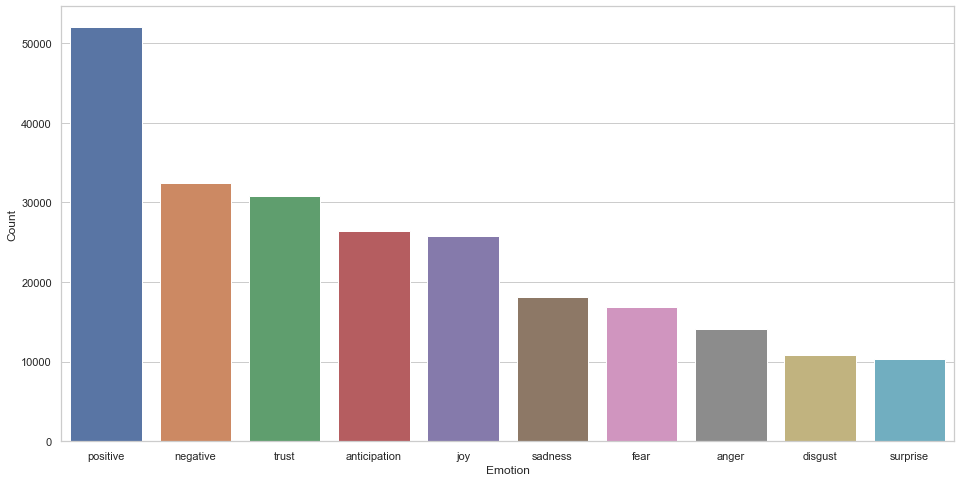

In [54]:
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (16, 8))
sns.barplot(x = 'Emotion', y = 'Count', data = emotion_p_df);

### Compare emotion values of 2 group

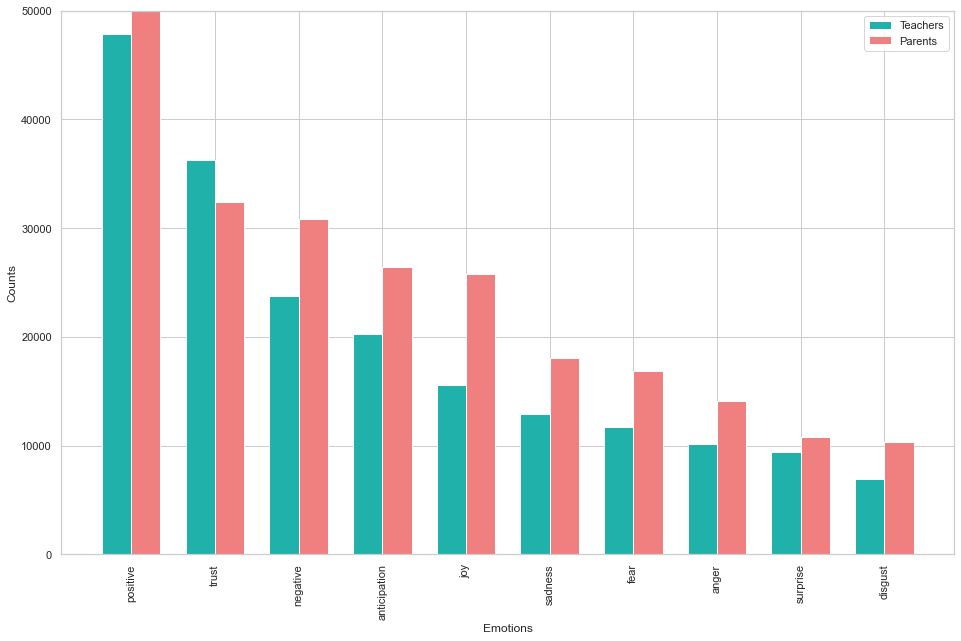

In [58]:

words= emotion_df['Emotion']
teacher_ = emotion_df['Count']
parenting_ = emotion_p_df['Count']
width = 0.35       # the width of the bars
ind = np.arange(10)

fig, ax = plt.subplots(figsize=(16, 10))
rects1 = ax.bar(ind, teacher_, width, color='lightseagreen')
rects2 = ax.bar(ind+width,parenting_, width, color='lightcoral')

# add some text for labels, title and axes ticks
ax.set_ylabel('Counts')
# ax.set_title('Emotions')
ax.set_xlabel('Emotions')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(words,rotation='vertical')

ax.set_ylim(0,50000)

ax.legend((rects1[0], rects2[0]), ('Teachers', 'Parents'))

plt.show()